In [1]:
using Pkg
Pkg.activate(".")
using MLDatasets
using Flux
using Statistics

# Force reload the module
if isdefined(Main, :AdversarialAttacks)
    # Clear the old module
    Main.AdversarialAttacks = nothing
end

include("src/AdversarialAttacks.jl")
using .AdversarialAttacks

  Activating project at `~/Documents/WS25/Julia/AdversarialAttacks.jl`


In [2]:
train_model = false

false

In [3]:
c10_train = CIFAR10(:train)
c10_test = CIFAR10(:test)

dataset CIFAR10:
  metadata  =>    Dict{String, Any} with 2 entries
  split     =>    :test
  features  =>    32×32×3×10000 Array{Float32, 4}
  targets   =>    10000-element Vector{Int64}

In [4]:
function preprocess(dataset)
    x, y = dataset[:]

    x = reshape(x, 32, 32, 3, :)

    # One-hot encode targets
    y = Flux.onehotbatch(y, 0:9)

    return x, y
end

preprocess (generic function with 1 method)

In [5]:
x_train, y_train = preprocess(c10_train)
x_test, y_test = preprocess(c10_test)

(Float32[0.61960787 0.59607846 … 0.23921569 0.21176471; 0.62352943 0.5921569 … 0.19215687 0.21960784; … ; 0.49411765 0.49019608 … 0.11372549 0.13333334; 0.45490196 0.46666667 … 0.078431375 0.08235294;;; 0.4392157 0.4392157 … 0.45490196 0.41960785; 0.43529412 0.43137255 … 0.4 0.4117647; … ; 0.35686275 0.35686275 … 0.32156864 0.32941177; 0.33333334 0.34509805 … 0.2509804 0.2627451;;; 0.19215687 0.2 … 0.65882355 0.627451; 0.18431373 0.15686275 … 0.5803922 0.58431375; … ; 0.14117648 0.1254902 … 0.49411765 0.5058824; 0.12941177 0.13333334 … 0.41960785 0.43137255;;;; 0.92156863 0.93333334 … 0.32156864 0.33333334; 0.90588236 0.92156863 … 0.18039216 0.24313726; … ; 0.9137255 0.9254902 … 0.7254902 0.7058824; 0.9098039 0.92156863 … 0.73333335 0.7294118;;; 0.92156863 0.93333334 … 0.3764706 0.39607844; 0.90588236 0.92156863 … 0.22352941 0.29411766; … ; 0.9137255 0.9254902 … 0.78431374 0.7647059; 0.9098039 0.92156863 … 0.7921569 0.78431374;;; 0.92156863 0.93333334 … 0.32156864 0.3254902; 0.90588236

In [6]:
batchsize = 256
train_loader = Flux.DataLoader((x_train, y_train); batchsize=batchsize, shuffle=true);
model = Chain(
    Conv((3, 3), 3 => 32, pad=1, relu),
    Conv((3, 3), 32 => 32, pad=1, relu),
    MaxPool((2, 2)),

    Conv((3, 3), 32 => 64, pad=1, relu),
    Conv((3, 3), 64 => 64, pad=1, relu),
    MaxPool((2, 2)),

    Flux.flatten,
    Dense(8 * 8 * 64, 256, relu),
    Dense(256, 10),
)
loss_fn(ŷ, y) = Flux.logitcrossentropy(ŷ, y)
optim = Flux.setup(Adam(0.001), model)


(layers = ((σ = (), weight = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; … ;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], Float32[0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0;;;; 0.0 0.0 0.0; 0.0 0.0 0.0

In [7]:
function accuracy(model)
    # Use onecold to return class index
    ŷ = Flux.onecold(model(x_test))
    y = Flux.onecold(y_test)

    return mean(ŷ .== y)
end

accuracy (generic function with 1 method)

In [8]:
losses = Float32[]
if train_model    
    for epoch in 1:5
        for (i, (x, y)) in enumerate(train_loader)
            loss, grads = Flux.withgradient(m -> loss_fn(m(x), y), model)
            Flux.update!(optim, model, grads[1])
            push!(losses, loss)
            if isone(i) || iszero(i % 50)
                acc = accuracy(model) * 100
                println("Epoch $epoch, step $i:\t loss = $(loss), acc = $(acc)%")
            end
        end
    end
end

In [9]:
# Save the trained model
using BSON: @save
@save "trained_model.bson" model

In [10]:
# Reload the model from file
using BSON: @load
@load "trained_model.bson" model
println("Model loaded successfully!")
model

Model loaded successfully!


Chain(
  Conv((3, 3), 3 => 32, relu, pad=1),   # 896 parameters
  Conv((3, 3), 32 => 32, relu, pad=1),  # 9_248 parameters
  MaxPool((2, 2)),
  Conv((3, 3), 32 => 64, relu, pad=1),  # 18_496 parameters
  Conv((3, 3), 64 => 64, relu, pad=1),  # 36_928 parameters
  MaxPool((2, 2)),
  Flux.flatten,
  Dense(4096 => 256, relu),             # 1_048_832 parameters
  Dense(256 => 10),                     # 2_570 parameters
)                   # Total: 12 arrays, 1_116_970 parameters, 4.262 MiB.

In [11]:
using Plots
if train_model
    plot(losses, title="Training Loss over Time", xlabel="Iteration", ylabel="Loss", legend=false)
end

In [ ]:
# Wrap the Flux model
flux_model = FluxModel(model)

# Select a single image (index 9) and keep batch dimension for the model
image_idx = 256 #164
x_sample = Float32.(x_test[:, :, :, image_idx:image_idx])  # Shape: 32×32×3×1, convert to Float32
y_sample = y_test[:, image_idx]  # One-hot vector for this image

# Create FGSM attack 
fgsm = FGSM(Dict("epsilon" => 0.05))

# Generate adversarial example
sample = (data=x_sample, label=y_sample)
adv_sample = attack(fgsm, flux_model, sample)

32×32×3×1 Array{Float64, 4}:
[:, :, 1, 1] =
 0.75      0.857843  0.738235  0.663726  …  0.555882  0.444118  0.436275
 0.853922  0.765686  0.742157  0.763726     0.459804  0.448039  0.540196
 0.865686  0.877451  0.857843  0.791176     0.571569  0.455882  0.448039
 0.777451  0.889216  0.865686  0.783333     0.587255  0.463726  0.448039
 0.889216  0.90098   0.873529  0.795098     0.618627  0.595098  0.57549
 0.885294  0.797059  0.769608  0.706863  …  0.542157  0.630392  0.506863
 0.781373  0.893137  0.769608  0.718627     0.565686  0.657843  0.542157
 0.873529  0.789216  0.861765  0.806863     0.70098   0.593137  0.681373
 0.765686  0.877451  0.861765  0.718627     0.748039  0.628431  0.60098
 0.769608  0.873529  0.765686  0.742157     0.683333  0.648039  0.608824
 ⋮                                       ⋱            ⋮         
 0.922549  0.942157  1.01471   0.995098     0.538235  0.657843  0.65
 0.883333  0.89902   0.983333  0.971569     0.689216  0.712745  0.604902
 0.944118  0.955882  

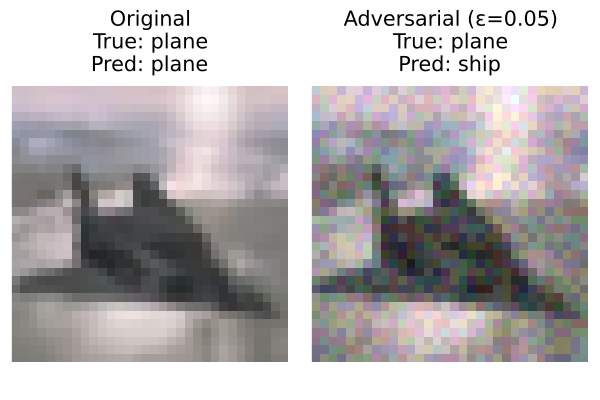

In [17]:
# Plot original vs adversarial image
using Images

# Get predictions
original_pred = model(x_sample)
adv_pred = model(adv_sample)

# Convert to class labels
original_class = Flux.onecold(original_pred, 0:9)[1]
adv_class = Flux.onecold(adv_pred, 0:9)[1]
true_class = Flux.onecold(y_sample, 0:9)

# CIFAR-10 class names
class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Extract single images (remove batch dimension)
img_original = x_sample[:, :, :, 1]  # 32x32x3
img_adv = adv_sample[:, :, :, 1]     # 32x32x3

# Clamp to valid range [0, 1]
img_original = clamp.(img_original, 0f0, 1f0)
img_adv = clamp.(img_adv, 0f0, 1f0)

# Convert to RGB format for display (CHW to CWH for colorview)
img_orig_rgb = colorview(RGB, permutedims(img_original, (3, 2, 1)))
img_adv_rgb = colorview(RGB, permutedims(img_adv, (3, 2, 1)))

# Plot side by side
p1 = plot(img_orig_rgb, axis=nothing, border=:none, 
          title="Original\nTrue: $(class_names[true_class+1])\nPred: $(class_names[original_class+1])")
p2 = plot(img_adv_rgb, axis=nothing, border=:none,
          title="Adversarial (ε=$(fgsm.parameters["epsilon"]))\nTrue: $(class_names[true_class+1])\nPred: $(class_names[adv_class+1])")

plot(p1, p2)